In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The working dataset is made available by kaggle:-)

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns: 

id - Unique ID for each home sold  
date - Date of the home sale  
price - Price of each home sold  
bedrooms - Number of bedrooms  
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower  
sqft_living - Square footage of the apartments interior living space  
sqft_lot - Square footage of the land space  
floors - Number of floors  
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not  
view - An index from 0 to 4 of how good the view of the property was  
condition - An index from 1 to 5 on the condition of the apartment,  
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of   construction and design, and 11-13 have a high quality level of construction and design.  
sqft_above - The square footage of the interior housing space that is above ground level  
sqft_basement - The square footage of the interior housing space that is below ground level  
yr_built - The year the house was initially built  
yr_renovated - The year of the house’s last renovation  
zipcode - What zipcode area the house is in  
lat - Lattitude  
long - Longitude  
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors   
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors  

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

# Part-1 EDA


In [3]:
df.isnull().sum()
# No missing values :-)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


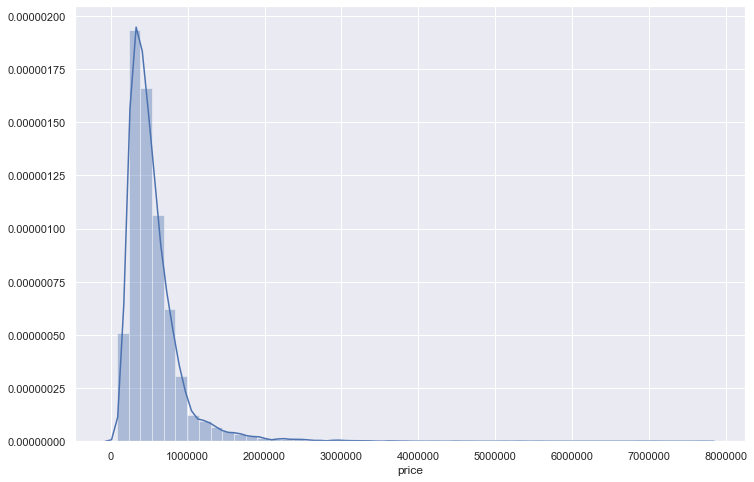

In [6]:
plt.figure(figsize = (12,8))
sns.set('notebook')
sns.distplot(df['price'])

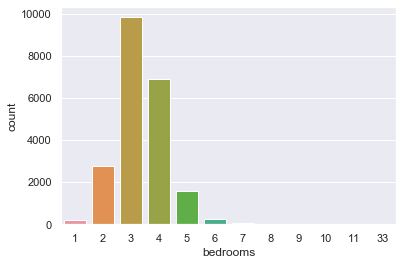

In [7]:
sns.countplot(df['bedrooms'])
# A guy got a 33 room mansion!

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

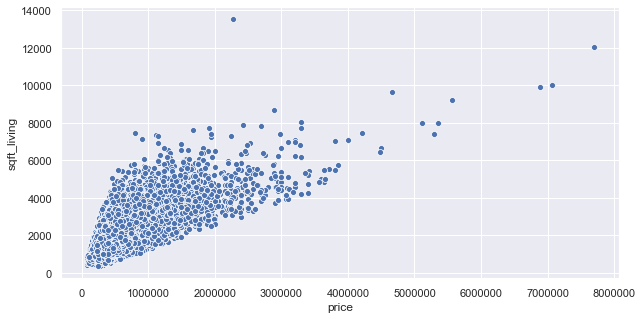

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['price'],df['sqft_living'],data=  df)

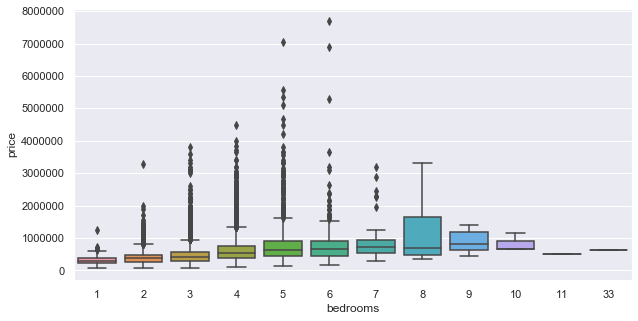

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y='price',data = df)

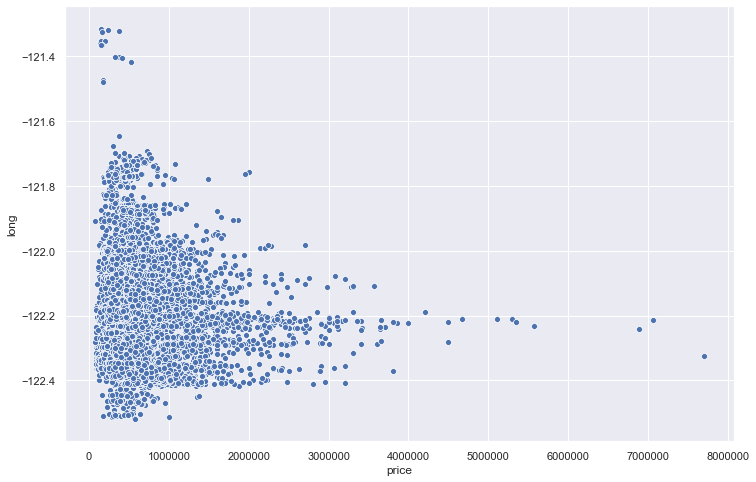

In [11]:
# I'm gonna do some visualisations location specific to exactly know if the prices vary rather highly with changing locations
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

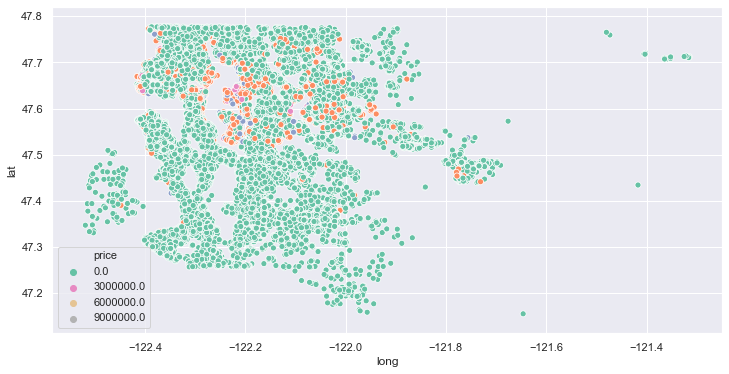

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='Set2')

In [19]:
len(df)*0.01

215.97

In [26]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [28]:
Exclude_top_1_percent = df.sort_values('price',ascending=False).iloc[216:]

In [29]:
Exclude_top_1_percent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


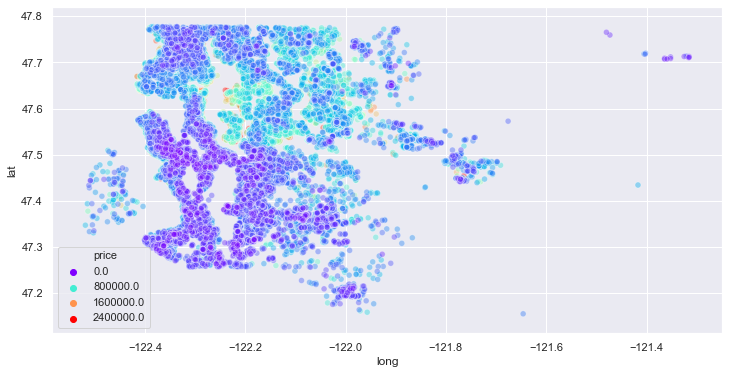

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=Exclude_top_1_percent,hue='price',palette='rainbow',alpha=0.4)

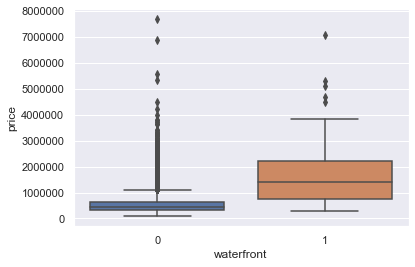

In [37]:
sns.boxplot(x='waterfront',y='price',data = df)

In [38]:
# If you're @ the waterfront, housing gonna be more expensive

Let's start the feature engineering 


In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df = df.drop('id',axis=1)

In [42]:
df['date'] = pd.to_datetime(df['date'])

In [43]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [44]:
df['year'] = df['date'].apply(lambda date:date.year)

In [45]:
df['month'] = df['date'].apply(lambda date:date.month)

In [46]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [47]:
# Let's see if there's amy relation b/w the price of the house and the month which this is selling at

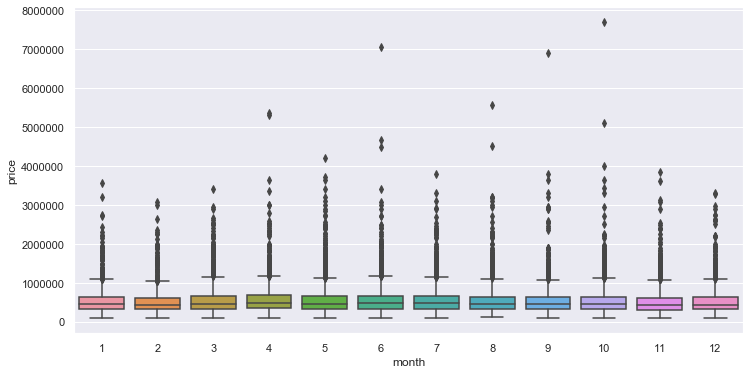

In [63]:
plt.figure(figsize=(12,6))
sns.set()
sns.boxplot(x='month',y='price',data=df)

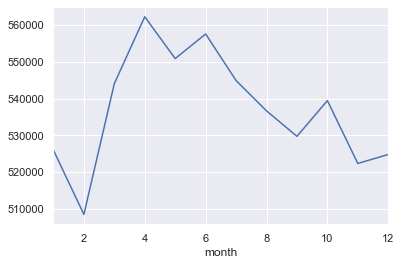

In [68]:
df.groupby('month').mean()['price'].plot()

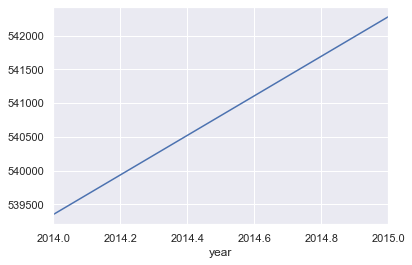

In [69]:

df.groupby('year').mean()['price'].plot()

In [70]:
df = df.drop('date',axis=1)

In [72]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [76]:
df.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819,2014,6
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711,2015,1
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,2015,4
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570,2015,3


In [75]:
df = df.drop('zipcode',axis=1)

In [78]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [80]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

# PART 2

In [81]:
X = df.drop('price',axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
# Time for scaling
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()


In [86]:
X_train = Scaler.fit_transform(X_train)

In [87]:
X_test = Scaler.transform(X_test)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [90]:
model = Sequential()

In [92]:
X_train.shape

(15117, 19)

In [94]:
# 19 incoming features ,So probably a good idea to take 19 neurons in our layer
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss= 'mse')

In [95]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs =400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 74us/sample - loss: 430240532558.4410 - val_loss: 418917801842.4099
Epoch 2/400
15117/15117 [==============================] - 0s 19us/sample - loss: 429102304212.1733 - val_loss: 414861011060.3062
Epoch 3/400
15117/15117 [==============================] - 0s 22us/sample - loss: 412164684379.2774 - val_loss: 375617672614.2421
Epoch 4/400
15117/15117 [==============================] - 0s 17us/sample - loss: 327949363482.7397 - val_loss: 240586184668.6025
Epoch 5/400
15117/15117 [==============================] - 0s 17us/sample - loss: 170476670181.6328 - val_loss: 107780205125.5309
Epoch 6/400
15117/15117 [==============================] - 0s 17us/sample - loss: 102192114225.8215 - val_loss: 95282219650.2123
Epoch 7/400
15117/15117 [==============================] - 0s 23us/sample - loss: 97596653523.5637 - val_loss: 93629259978.2716
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 21us/sample - loss: 37669215743.0855 - val_loss: 36313062058.6667
Epoch 65/400
15117/15117 [==============================] - 0s 20us/sample - loss: 37437106567.5274 - val_loss: 36172837192.6914
Epoch 66/400
15117/15117 [==============================] - 0s 32us/sample - loss: 37333199924.6327 - val_loss: 35989549511.1111
Epoch 67/400
15117/15117 [==============================] - 0s 33us/sample - loss: 37136474277.8234 - val_loss: 35828895941.2148
Epoch 68/400
15117/15117 [==============================] - 0s 25us/sample - loss: 36974817653.0349 - val_loss: 35704794519.0716
Epoch 69/400
15117/15117 [==============================] - 0s 21us/sample - loss: 36851697680.6636 - val_loss: 35535138082.7654
Epoch 70/400
15117/15117 [==============================] - 0s 21us/sample - loss: 36771214634.5227 - val_loss: 35472577270.5185
Epoch 71/400
15117/15117 [==============================] - 0s 20us/sample - loss: 36619139544.6779 - val_loss

15117/15117 [==============================] - 0s 17us/sample - loss: 32895109111.1940 - val_loss: 31362418273.3432
Epoch 128/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32885212612.1532 - val_loss: 31359428269.1951
Epoch 129/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32818329871.4951 - val_loss: 31402694797.5901
Epoch 130/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32788441141.5133 - val_loss: 31246431168.7901
Epoch 131/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32771839312.9981 - val_loss: 31202126354.9630
Epoch 132/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32767548833.6067 - val_loss: 31282194320.7506
Epoch 133/400
15117/15117 [==============================] - 0s 19us/sample - loss: 32689759096.1847 - val_loss: 31144603157.4914
Epoch 134/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32673914789.2307 - v

15117/15117 [==============================] - 0s 22us/sample - loss: 31390984013.5773 - val_loss: 29567072625.1457
Epoch 191/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31406120258.5021 - val_loss: 29600743712.2370
Epoch 192/400
15117/15117 [==============================] - 0s 26us/sample - loss: 31347867922.4079 - val_loss: 29499162148.6617
Epoch 193/400
15117/15117 [==============================] - 0s 20us/sample - loss: 31351854546.9202 - val_loss: 29503150717.1556
Epoch 194/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31334369037.6323 - val_loss: 29476795268.1086
Epoch 195/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31336936069.9525 - val_loss: 29480763260.5235
Epoch 196/400
15117/15117 [==============================] - 0s 19us/sample - loss: 31318699041.3950 - val_loss: 29410642203.1802
Epoch 197/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31289327876.7247 - v

15117/15117 [==============================] - 0s 26us/sample - loss: 30557816021.3757 - val_loss: 28515858978.1333
Epoch 254/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30591226833.7009 - val_loss: 28782141571.4765
Epoch 255/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30555102979.0652 - val_loss: 28581768285.5506
Epoch 256/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30510961202.6344 - val_loss: 28630807711.2889
Epoch 257/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30537443124.1754 - val_loss: 28481220304.5926
Epoch 258/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30541189837.7551 - val_loss: 28454586595.5556
Epoch 259/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30524783725.8038 - val_loss: 28424617680.5926
Epoch 260/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30505264702.8950 - v

15117/15117 [==============================] - 0s 16us/sample - loss: 29932225765.2942 - val_loss: 27712238407.4272
Epoch 317/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29965604473.8273 - val_loss: 27720362514.9630
Epoch 318/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29914998101.0624 - val_loss: 27686547835.2593
Epoch 319/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29902135873.9432 - val_loss: 27661598325.5704
Epoch 320/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29902239713.7887 - val_loss: 27650278129.4617
Epoch 321/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29888218520.5297 - val_loss: 27754439697.6988
Epoch 322/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29900513983.3946 - val_loss: 27691984188.0494
Epoch 323/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29897212206.2483 - v

15117/15117 [==============================] - 0s 22us/sample - loss: 29424748824.9108 - val_loss: 27035830236.6025
Epoch 380/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29386438322.5920 - val_loss: 27002390229.6494
Epoch 381/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29430323658.0464 - val_loss: 26951458583.3877
Epoch 382/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29366136894.1838 - val_loss: 26941244919.1506
Epoch 383/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29354940242.7254 - val_loss: 26949537953.8173
Epoch 384/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29363435941.8742 - val_loss: 26911196218.1531
Epoch 385/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29402678997.2063 - val_loss: 26890834405.4519
Epoch 386/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29381087143.1273 - v

In [100]:
losses=  pd.DataFrame(model.history.history)
# val_loss is the loss on the training data

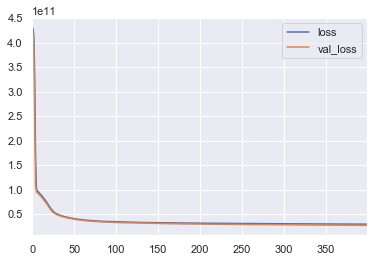

In [101]:
losses.plot()

In [102]:
# Now, let's show some analysis of test data

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [104]:
model_predictions = model.predict(X_test)

In [105]:
mean_absolute_error(y_test,model_predictions)

100968.7336564429

In [106]:
np.sqrt(mean_squared_error(y_test,model_predictions)) 

163387.53237550665

In [107]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [108]:
5.402966e+05

540296.6

In [110]:
explained_variance_score(y_test,model_predictions)

0.7987040248941979

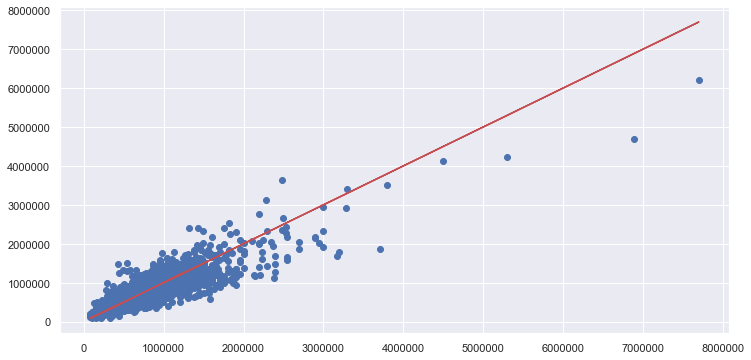

In [114]:
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=model_predictions)
plt.plot(y_test,y_test, 'r')

In [117]:
new_house=df.drop('price',axis=1).iloc[0]

In [122]:
single_house = Scaler.transform(new_house.values.reshape(-1,19))

In [123]:
model.predict(single_house)

array([[283885.22]], dtype=float32)

In [124]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
